In [41]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation, CSVManager
from utility_classes.historical_data_processor import FTXDataProcessor
import seaborn as sns 
import dateutil.parser as dp


In [42]:
# df_spot = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/BTC_historical_data.csv').change_resolution('5T', 'SPOT')
# df_perp = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/BTC-PERP_historical_data.csv').change_resolution('5T', 'PERP')

df_spot = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/BTMX_historical_data.csv').change_resolution('5T', 'SPOT')
df_perp = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/BTMX-PERP_historical_data.csv').change_resolution('5T', 'PERP')

df_perp.rename(columns={'open': 'perp_open', 'high': 'perp_high', 'low': 'perp_low', 'close': 'perp_close', 'volume': 'perp_volume'}, inplace=True)
df_spot.rename(columns={'open': 'spot_open', 'high': 'spot_high', 'low': 'spot_low', 'close': 'spot_close', 'volume': 'spot_volume'}, inplace=True)
                            
joint_df = pd.merge(df_perp, df_spot, how='inner', on=['timestamp'])

joint_df['spread_open'] = joint_df['perp_open'] - joint_df['spot_open']
joint_df['spread_open%'] = (joint_df['perp_open'] - joint_df['spot_open'])/joint_df['perp_open']*100

joint_df['spread_high'] = joint_df['perp_high'] - joint_df['spot_high']
joint_df['spread_high%'] = (joint_df['perp_high'] - joint_df['spot_high'])/joint_df['perp_high']*100

joint_df['spread_low'] = joint_df['perp_low'] - joint_df['spot_low']
joint_df['spread_low%'] =(joint_df['perp_low'] - joint_df['spot_low'])/joint_df['perp_low']*100

joint_df['spread_close'] = joint_df['perp_close'] - joint_df['spot_close']
joint_df['spread_close%'] = (joint_df['perp_close'] - joint_df['spot_close'])/joint_df['perp_close']*100

joint_df.drop(columns=['perp_open', 'spot_open', 'perp_high', 'spot_high', 'perp_low', 'spot_low', 'perp_close', 'spot_close'], inplace=True)
joint_df=joint_df.set_index('timestamp')
joint_df

,perp_volume,funding_rate,spot_volume,spread_open,spread_open%,spread_high,spread_high%,spread_low,spread_low%,spread_close,spread_close%
timestamp,,,,,,,,,,,
2019-10-25T04:15:00+00:00,0.013096,-0.000044,987.600000,-0.000085,-0.129751,-0.00033,-0.503740,-0.000125,-0.190927,-0.00033,-0.503817
2019-10-25T04:20:00+00:00,0.006542,-0.000044,0.000000,-0.000330,-0.503817,-0.00033,-0.503817,-0.000340,-0.519719,-0.00034,-0.519481
2019-10-25T04:25:00+00:00,0.000000,-0.000044,0.000000,-0.000340,-0.519481,-0.00030,-0.457736,-0.000350,-0.535005,-0.00037,-0.565144
2019-10-25T04:30:00+00:00,0.452600,-0.000044,0.000000,-0.000330,-0.503740,-0.00019,-0.289414,-0.000300,-0.461467,-0.00030,-0.461467
2019-10-25T04:35:00+00:00,0.038978,-0.000044,0.000000,-0.000300,-0.461467,-0.00030,-0.461467,-0.000300,-0.462036,-0.00030,-0.462036
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-02T23:20:00+00:00,5872.723704,0.000047,1624.904183,0.001180,0.093563,0.00168,0.133156,-0.001290,-0.102496,0.00169,0.133961
2021-04-02T23:25:00+00:00,17725.307817,0.000047,4870.449407,0.001680,0.133170,0.00261,0.206736,0.000090,0.007149,0.00235,0.186214
2021-04-02T23:30:00+00:00,18583.284521,0.000047,20156.974046,0.002350,0.186214,0.00466,0.368324,0.002250,0.178393,0.00283,0.224174


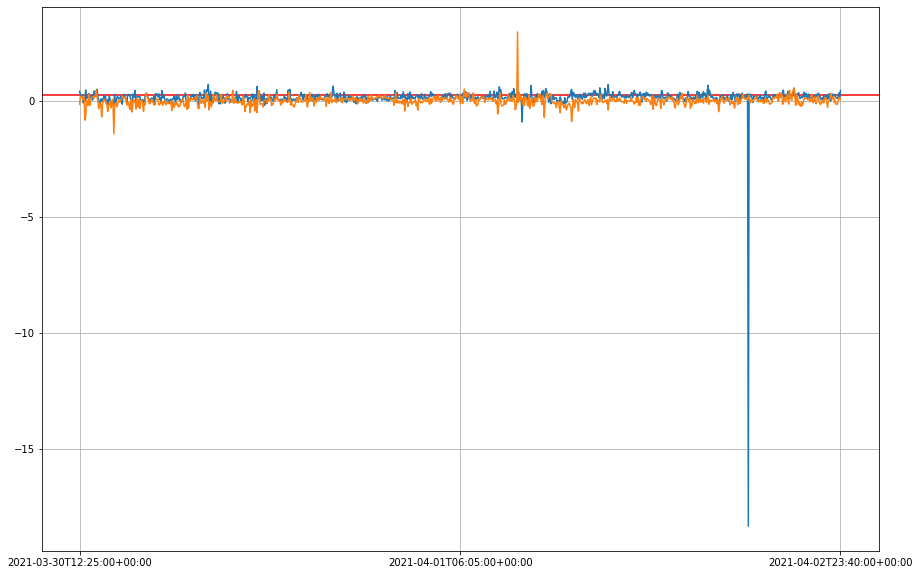

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
spread_high=joint_df['spread_high%'].tail(1000)
spread_low=joint_df['spread_low%'].tail(1000)

ax.set_xticks([0, 500, 999])
ax.grid()
ax.axhline(y=0.28, color='r', linestyle='-')

ax.plot(spread_high)
ax.plot(spread_low)

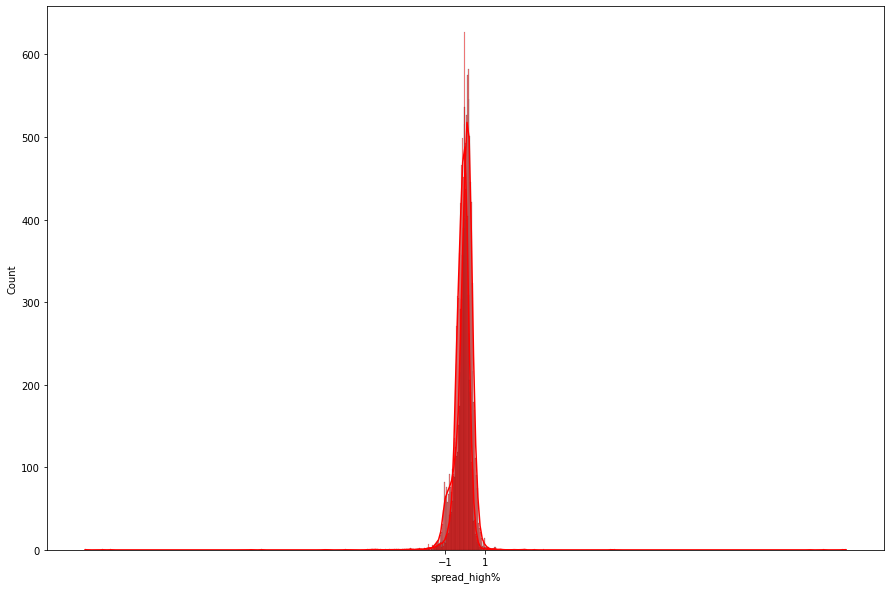

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(data=spread_high, color='r', kde=True)
sns.histplot(data=spread_low, color='r', kde=True)
ax.set_xticks([-1,1])

In [45]:
min_std = np.std(joint_df['spread_close%'].tail(9600))
min_std 

0.24139832840495964